**TASK 3**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

sns.set_style("darkgrid")


In [11]:
import pandas as pd

# Load the full dataset
df = pd.read_csv('/content/bank_marketing_cleaned.csv', sep=';')

# View first few rows
df.head()


,"age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y"
0,"58,management,married,tertiary,no,2143,yes,no,..."
1,"44,technician,single,secondary,no,29,yes,no,un..."
2,"33,entrepreneur,married,secondary,no,2,yes,yes..."
3,"47,blue-collar,married,unknown,no,1506,yes,no,..."
4,"33,unknown,single,unknown,no,1,no,no,unknown,5..."


In [12]:
# Check for nulls
print(df.isnull().sum())

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y    0
dtype: int64


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [34]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the cleaned dataset
data = pd.read_csv('/content/bank_marketing_cleaned.csv')

# Step 3: Check basic info (optional)
print(data.head())
print(data.info())

from sklearn.preprocessing import LabelEncoder

df = data.copy()
label_enc = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = label_enc.fit_transform(df[col])



   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

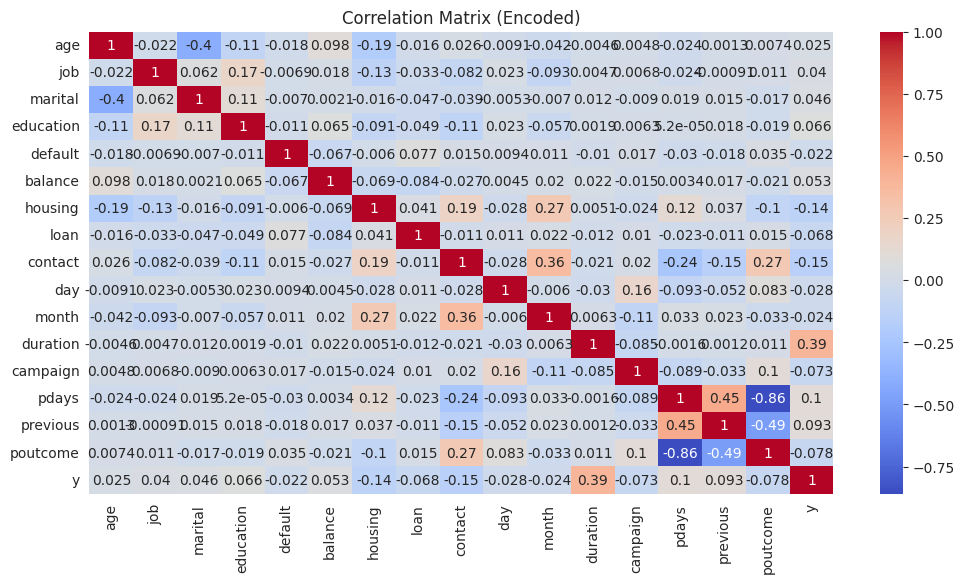

In [35]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Matrix (Encoded)")
plt.show()


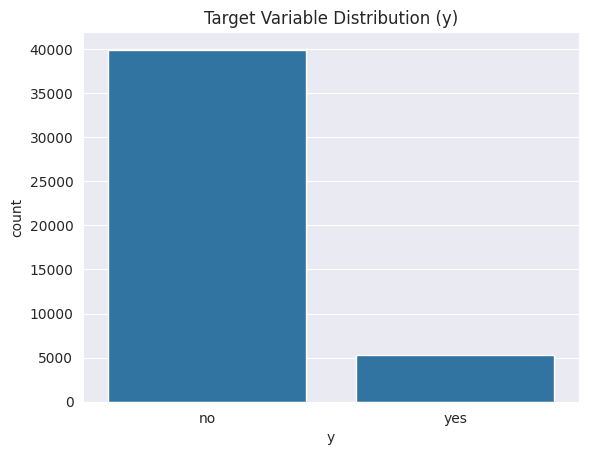

In [28]:
sns.countplot(x='y', data=data)
plt.title("Target Variable Distribution (y)")
plt.show()


In [31]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of your data
df = data.copy()

# Apply Label Encoding to all object (string) columns
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

# Now split features and target
X = df.drop('y', axis=1)
y = df['y']

# Proceed with model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

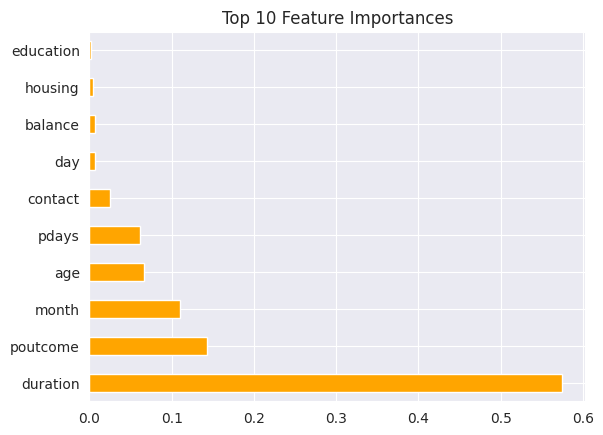

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='orange')
plt.title("Top 10 Feature Importances")
plt.show()
